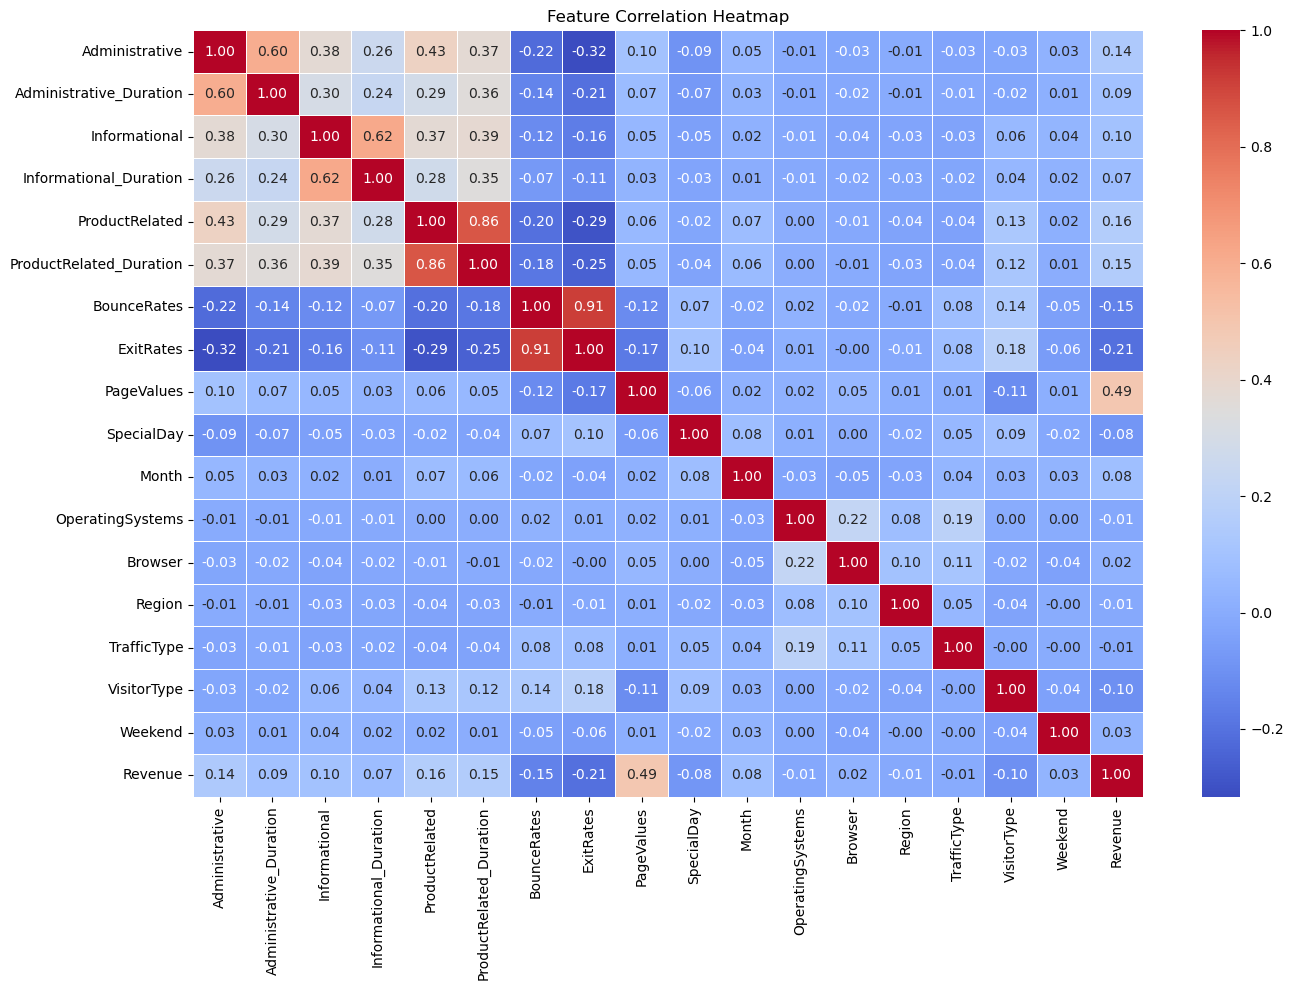

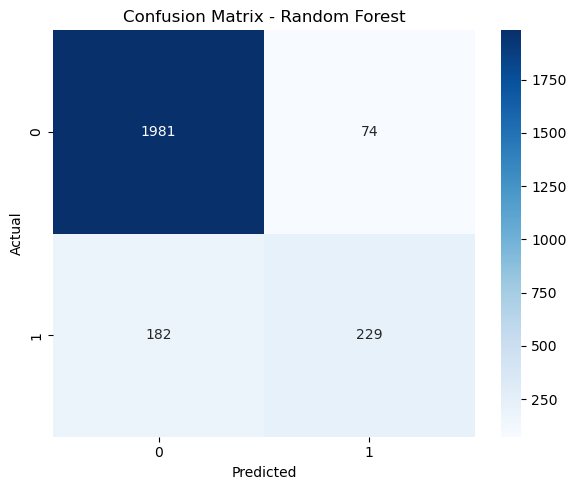

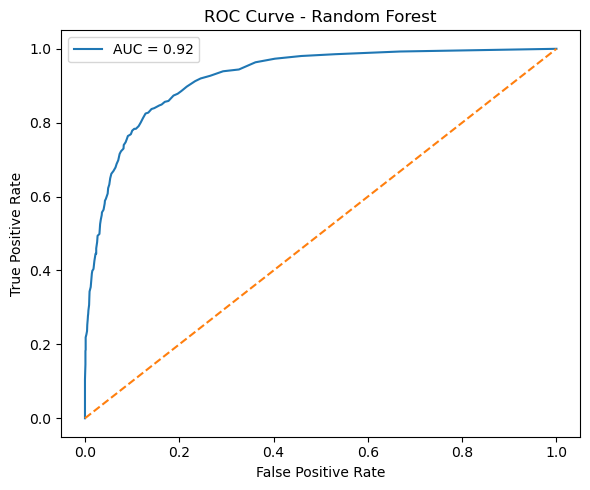

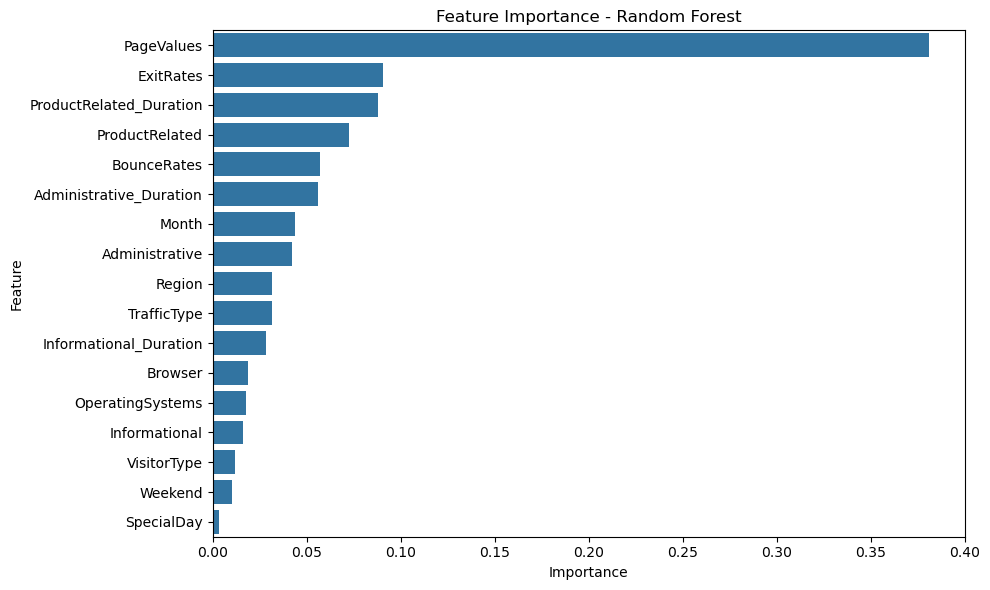

Random Forest Classifier Model:
 RandomForestClassifier()

Accuracy of the Random Forest model: 0.8962


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Load and preprocess data
df = pd.read_csv("C:/Users/rudra/Downloads/online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv")
df.dropna(inplace=True)

le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

#Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

X = df.drop('Revenue', axis=1)
y = df['Revenue']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 📈 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 📉 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

# 🌟 3. Feature Importance
importances = rf_model.feature_importances_
features = df.drop('Revenue', axis=1).columns
feature_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()
# ✅ Print Accuracy and Model Summary
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Model:\n", rf_model)
print(f"\nAccuracy of the Random Forest model: {accuracy:.4f}")


In [52]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(rf_model, 'model.pkl')

['model.pkl']

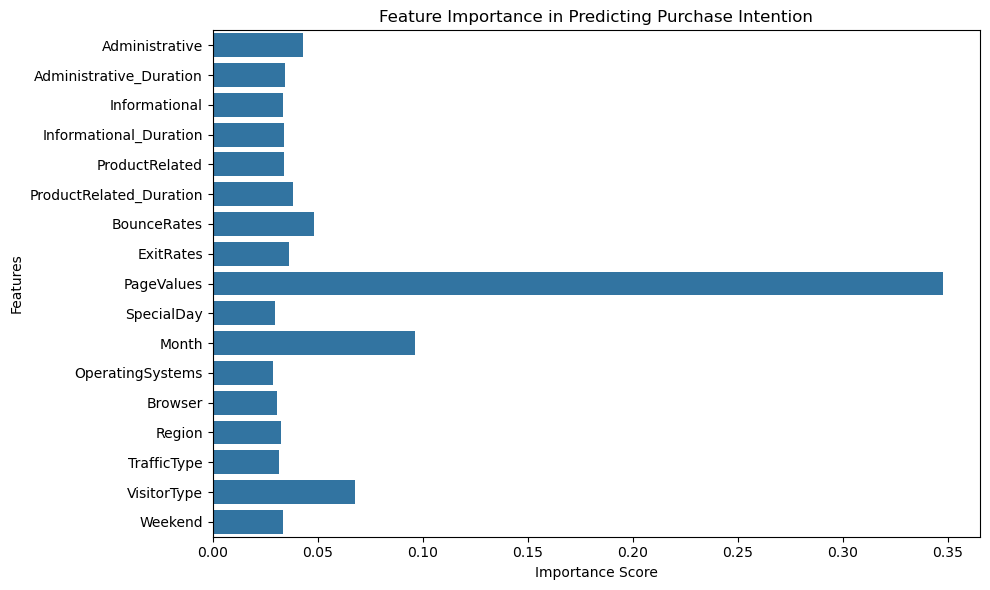

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `model` is your trained RandomForestClassifier
importances = model.feature_importances_
feature_names = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
    'Region', 'TrafficType', 'VisitorType', 'Weekend'
]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Predicting Purchase Intention")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
